# Exploratory Data Analysis on Sales Dataset

![](https://wallpapercave.com/wp/wp2239512.jpg)

###Project Statement
Exploratory data analysis, or EDA, is an important aspect of data science. It allows us to analyse data sets and summarise them with visuals and findings.

In this project, I’ll be analysing a Sales data set available on Kaggle. The sales dataset contain information abour products, categories, dates, and basic information of customer with location. I’m hoping that by the end of this project, I will better understand the relationships that sales, most sold products, and other demographics have on workplace-related things.

The purpose behind choosing this data set to study is to understand sales in current market, product demands, trend in sales, delivery details based on location etc.. This dataset is good example dataset not a realtime data however it'll be very good dataset for a beginner to understand structure of current sales data in real world
******************************************
******************************************

Sales dataset is a publically available dataset from Kaggle, This is the link to the dataset https://www.kaggle.com/datasets/akavinashk07/sales-dataset 

**Introduction about dataset**

This is Sample data set which have information about sales of products across different countries of world. It contains 51290 rows and 20 columns of data. This is a practice dataset for begineers to understand data analysis. It has data only for the yeat 2015. Below are the the column description, we will understand more on datatypes and size as we proceed through project

>  **About Dataset**


1. Order ID - Unique order ID reference to each order
2. Order Date - Date of Order
3. Shipping Date - Delivery date of Order
4. Aging - Difference between shipping date and order date
5. Ship Mode - Mode of shipping
6. Product Category - Category of the product 
7. Product - Product description
8. Sales - Product of Quantity and Unit price (in US dollars - $) 
9. Quantity - Unit quantity of the order
10. Discount - Percentage of discount with respect to unit price
11. Profit - Shippping cost percentage is considered as profit
12. Shipping Cost - Delivery Charges in US dollar 
13. Order Priority - Priority of the order
14. Customer ID - Unique ID for each order
15. Customer Name - Name of the customer
16. Segment - Customer professional category
17. City - City of the customer located / product delivered
18. State - State of the customer located / product delivered
19. Country - Country of the customer located / product delivered
20. Region - Region of the customer located / product delivered
 

In [ ]:
# Installing opendatasets library

!pip install opendatasets --upgrade --quiet
import opendatasets as od 

In [ ]:
# Dowloading dataset using opendatasets

od.download('https://www.kaggle.com/datasets/akavinashk07/sales-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: trineshnk
Your Kaggle Key: ··········


100%|██████████| 6.53M/6.53M [00:00<00:00, 99.9MB/s]

In [ ]:
# list downloaded files and size

!ls -lh sales-dataset/

total 6.8M
-rw-r--r-- 1 root root 6.8M Feb 13 04:44 'Project 02_Ecommerce_Dataset.xlsx'


In [ ]:
# Longest length of file 

!wc -l '/content/sales-dataset/Project 02_Ecommerce_Dataset.xlsx'


29271 /content/sales-dataset/Project 02_Ecommerce_Dataset.xlsx


## Perform data preparation & cleaning
  


In [ ]:
# Install pandas jovian and other required libraries
!pip install pandas wordcloud jovian --upgrade --quiet

import pandas as pd
import jovian

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# link to the excel file
sales_excel = '/content/sales-dataset/Project 02_Ecommerce_Dataset.xlsx'

# Reading excel file using pandas
sales_data = pd.read_excel(sales_excel, sheet_name=1)

Checking shape of the dataset using `.shape` function
  * It has 51290 rows and 20 columns

In [ ]:
# Shape of the dataset
sales_data.shape

(51290, 20)

> `.info()` provides brienf information about whole dataset such as column names, not null values, datatypes 
  * It has 51290 rows and 20 columns
  * There are no non null values in the dataset
  * Datatypes are Sting data or descriptions are `object`, Date and Time are of `datetime`, Numerical values such as Integers are `int`, Decimal values are of type `float`

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51290 non-null  object        
 1   Order Date        51290 non-null  datetime64[ns]
 2   Shipping Date     51290 non-null  datetime64[ns]
 3   Aging             51290 non-null  int64         
 4   Ship Mode         51290 non-null  object        
 5   Product Category  51290 non-null  object        
 6   Product           51290 non-null  object        
 7   Sales             51290 non-null  int64         
 8   Quantity          51290 non-null  int64         
 9   Discount          51290 non-null  float64       
 10  Profit            51290 non-null  float64       
 11  Shipping Cost     51290 non-null  float64       
 12  Order Priority    51290 non-null  object        
 13  Customer ID       51290 non-null  object        
 14  Customer Name     5129

`.describe()` will give brief numerical analysis of the dataset. We can observe total count, max, min, average, standard deviation etc..

In [ ]:
# Descirption of the numerical columns of the dataset
sales_data.describe()

,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,5.255040,156.431683,2.997309,0.029971,72.721836,7.272184
std,2.959905,65.781374,1.413453,0.014114,49.099328,4.909933
min,1.000000,33.000000,1.000000,0.010000,0.510000,0.051000
25%,3.000000,109.000000,2.000000,0.020000,25.730000,2.573000
50%,5.000000,159.000000,3.000000,0.030000,67.000000,6.700000
75%,8.000000,218.000000,4.000000,0.040000,120.560000,12.056000
max,10.000000,250.000000,5.000000,0.050000,167.500000,16.750000


> Aging - Max 10 days taken for a deliver and min 1 day for delivery on an average 5 days an order is delivered

> Sales - 250 is the maximum sales in US dollar, 33 is the minimum sales on an average $ 156 sales across the dataset

> Discount - 5% is the maximum discount and 1% in the minimum discount

> Profit and Shipping cost looks like co related. 10% of profit is shipping cost for all the order [assumed value] 

Check for any missing values from the dataframe

In [ ]:
# missing values in dataframe
sales_data.isna().sum()

Order ID            0
Order Date          0
Shipping Date       0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
dtype: int64

> Looks like there are no missing values

In [ ]:
# Duplicate values in dataframe
sales_data.duplicated().sum()

0

> there are no duplicate values in the dataframe

In [ ]:
# List all the columns from dataframe

sales_data.columns

Index(['Order ID', 'Order Date', 'Shipping Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Region'],
      dtype='object')

In [ ]:
# Drop columns that are not required for analysis

sales_data.drop(['Profit', 'Shipping Cost'], axis=1, inplace=True)


In [ ]:
sales_data.columns

Index(['Order ID', 'Order Date', 'Shipping Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Order Priority', 'Customer ID', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Region'],
      dtype='object')

> Profit and Shipping Cost columns are dropped as they are linear for all the orders

Lets create additional columns from the column **Order Date**. Extracting year, month, day, and weekday from order date to create individual columns

In [ ]:
sales_data['year'] = pd.DatetimeIndex(sales_data['Order Date']).year
sales_data['month'] = pd.DatetimeIndex(sales_data['Order Date']).month_name()
sales_data['day'] = pd.DatetimeIndex(sales_data['Order Date']).day
sales_data['weekday'] = pd.DatetimeIndex(sales_data['Order Date']).day_name()

In [ ]:
sales_data.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Customer Name,Segment,City,State,Country,Region,year,month,day,weekday
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,0.05,...,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,2015,November,9,Monday
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,0.03,...,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,2015,June,30,Tuesday
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,2015,December,5,Saturday
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,0.05,...,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,2015,May,9,Saturday
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,0.04,...,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,2015,July,9,Thursday


Add a new column called **Price each** by dividing **Sales** by **Quantity**

In [ ]:
sales_data['Price each'] = sales_data.Sales / sales_data.Quantity

In [ ]:
sales_data.columns

Index(['Order ID', 'Order Date', 'Shipping Date', 'Aging', 'Ship Mode',
       'Product Category', 'Product', 'Sales', 'Quantity', 'Discount',
       'Order Priority', 'Customer ID', 'Customer Name', 'Segment', 'City',
       'State', 'Country', 'Region', 'year', 'month', 'day', 'weekday',
       'Price each'],
      dtype='object')

> New columns added are year, month, day, weekday and Price each

## Perform exploratory analysis & visualization
 

Lets install required python libraries for data analysis 
  * matplotlib
  * seaborn
  * plotly
  * folium

In [ ]:
!pip install seaborn plotly folium --upgrade --quiet
!pip install matplotlib==3.1.3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 103.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 64.3 MB/s eta 0:00:00


In [ ]:
!pip install numpy --upgrade --quiet
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import seaborn as sns

In [ ]:
# Numercial columns and their insights
sales_data.describe()

,Aging,Sales,Quantity,Discount,year,day,Price each
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.0,51290.000000,51290.000000
mean,5.255040,156.431683,2.997309,0.029971,2015.0,15.745564,71.492014
std,2.959905,65.781374,1.413453,0.014114,0.0,8.786094,57.628531
min,1.000000,33.000000,1.000000,0.010000,2015.0,1.000000,6.600000
25%,3.000000,109.000000,2.000000,0.020000,2015.0,8.000000,31.000000
50%,5.000000,159.000000,3.000000,0.030000,2015.0,16.000000,54.000000
75%,8.000000,218.000000,4.000000,0.040000,2015.0,23.000000,85.000000
max,10.000000,250.000000,5.000000,0.050000,2015.0,31.000000,250.000000


> The above draft gives us numerical information such as count average max min values and more.


In [ ]:
# Toal unique contries
sales_data.Country.nunique()

147

####Below is an example of matplotlib plot about highest sold products in 2015

Text(0, 0.5, 'Count')

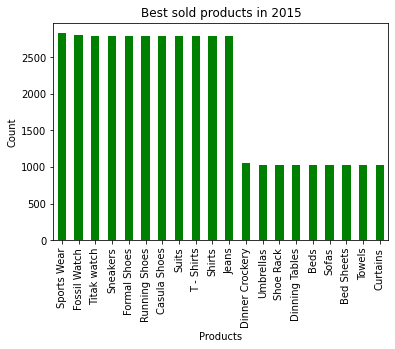

In [ ]:
#Identify highest sold products from dataframe and plot a simple bar graph

sales_data['Product'].value_counts().head(20).plot(kind='bar', color=['green'])
plt.title("Best sold products in 2015")
plt.xlabel('Products')
plt.ylabel('Count')

> Sports wear is the highest sold product and 

####  Lets plot the same graph using plotly 


In [ ]:
x = sales_data['Product'].value_counts()
x.head()

Sports Wear     2827
Fossil Watch    2796
Titak watch     2795
Sneakers        2795
Formal Shoes    2795
Name: Product, dtype: int64

Below is an example of plotly express plot, You can identify the syntax for plotly

In [ ]:
fig = px.bar(x)

fig.update_layout(title='Best sold products in 2015',
                  xaxis_title='Products',
                  yaxis_title='Count',
                  )

fig.update_traces(showlegend=False)
fig.show()

> From the above two graphs plotly gives us more interactivity, just hover on graph which gives all values. Plotly has diverse functions to make it more interactive and attractive

We can plot different kinds of plot using plotly. For example line graph, bar graph, histogram, pie chart etc

Lets see one by one

In [ ]:
#Total count of each segment
segment = sales_data.Segment.value_counts().reset_index()

In [ ]:
segment

,index,Segment
0,Consumer,26518
1,Corporate,15429
2,Home Office,9343


In [ ]:
#Plot a line graph using plotly
fig = px.line(segment, x='index', y='Segment', title='Overall customer segment representation')

fig.update_layout(xaxis_title='Segment',
                  yaxis_title='Count')

fig.show()

> Consumer segment can be the targetting category for highest sales. You can observe huge difference between customer segment from home office to Consumer

How can you represent Product Category through bar graph, lets try

In [ ]:
category = pd.DataFrame(sales_data['Product Category'].value_counts())

In [ ]:
category

,Product Category
Fashion,30775
Home & Furniture,10309
Auto & Accessories,7505
Electronic,2701


In [ ]:
fig = px.bar(category)

fig.update_layout(xaxis_title='Product Category',
                  yaxis_title='Count',
                  title='Product Category representation',
                  )

fig.update_traces(showlegend=False)

fig.show()

> From the above analysis we can conclude that Fashion is the highest grossing product category and Electronis are least

Ship mode representation through pie chart

In [ ]:
#Create a dataframe using pandas
ship_mode = pd.DataFrame(sales_data['Ship Mode'].value_counts())

In [ ]:
ship_mode

,Ship Mode
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


In [ ]:
#Pie representation on Ship mode
fig = px.pie(sales_data, names="Ship Mode")

fig.update_layout(title="Ship Mode Pie representation")

> Standard class is the highes used way for ship mode fallowed by second class and first class

What is the distribution of unit price based on product category?

In [ ]:
fig = px.histogram(sales_data, 
                   x='Price each', 
                   marginal='box', 
                   color='Product Category',
                   color_discrete_sequence=['blue',  'yellow','grey', 'green'], 
                   title='Distribution Unit price on each product')
fig.update_layout(bargap=0.1)
fig.show()

> It appears that unit price for fashion category more comparitively. Also there are few outliers whose unit price is more than $200

> Electronics and Auto & Accessories are almost same except number of orders

## Ask & answer questions about the Sales data and list out useful insights
  

### Q1. What are top countries based on highest sales?

<ipython-input-37-ef0090adb711>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Text(0.5, 1.0, 'Top 20 countries based on highest Sales')

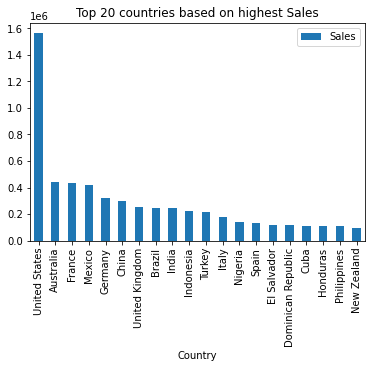

In [ ]:
sales_data.groupby('Country', as_index=False).agg('sum')[['Country','Sales']].sort_values(by='Sales', ascending=False).head(20).plot(kind='bar', x='Country', y='Sales')
plt.title('Top 20 countries based on highest Sales')

> Unites States in the top country with highest number of sales fallowed by Australia, France, Mexico and etc

In [ ]:
df = sales_data.groupby('Country', as_index=False).agg('sum')[['Country','Sales']].sort_values(by='Sales', ascending=False).head(20)

<ipython-input-38-5a5133425fb0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:

df.head()

,Country,Sales
139,United States,1562170
6,Australia,442452
44,France,437441
81,Mexico,418795
47,Germany,323619


In [ ]:
fig = px.line(df, x='Country', y='Sales', title='Top 20 countries based on Sales')

fig.update_layout(yaxis_title='Sales (million)')

fig.show()

> Unites States in the top country with highest number of sales fallowed by Australia, France, Mexico and etc

### Q2. Describe the distribution of aging across different cities of world

In [ ]:
# Lets add new column World to dataframe
sales_data['World'] = 'World'

In [ ]:
fig = px.treemap(sales_data, 
                 path=['World','Country', 'State'], 
                 values='Sales',
                 color='Aging', 
                 color_continuous_scale='Edge',
                 title='Distribution of Aging based on location')
fig.show()

> From the above graph we can say that average number days for delivery can be 5 to 7 days.

> Size of the box refers to the amount of sales for the respective location

> We can easily identify number of sales based on city or state or country

### Q3. Represent Average sales on each day from the sales data

In [ ]:
x=pd.DataFrame(sales_data.groupby('Order Date')[['Sales', 'Discount']].mean()).reset_index()

x.head()

,Order Date,Sales,Discount
0,2015-01-01,158.909774,0.029248
1,2015-01-02,152.280000,0.031200
2,2015-01-03,151.161017,0.030169
3,2015-01-04,156.517483,0.033916
4,2015-01-05,142.223881,0.030746


In [ ]:
px.line(x, x="Order Date", y='Sales', title='Daywise average sales')

> It is observed that mots of the average sales between 150 & 165

> Highest number of avg sales was on 1st of June

> Least daywise average sales on 5th of July

#### **Lets Create a new dataframe for only India**

In [ ]:
india_sales_df = sales_data.query("Country == 'India'")

In [ ]:
india_sales_df.head()

,Order ID,Order Date,Shipping Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,City,State,Country,Region,year,month,day,weekday,Price each,World
20,AU-2015-21,2015-12-09,2015-12-13,4,First Class,Auto & Accessories,Car Body Covers,117,5,0.01,...,Bhopal,Madhya Pradesh,India,Central Asia,2015,December,9,Wednesday,23.4,World
25,AU-2015-26,2015-04-06,2015-04-10,4,First Class,Auto & Accessories,Car Seat Covers,114,4,0.02,...,Raipur,Uttarakhand,India,Central Asia,2015,April,6,Monday,28.5,World
46,AU-2015-47,2015-03-12,2015-03-18,6,First Class,Auto & Accessories,Car Speakers,211,1,0.01,...,Vadodara,Gujarat,India,Central Asia,2015,March,12,Thursday,211.0,World
70,AU-2015-71,2015-03-06,2015-03-08,2,First Class,Auto & Accessories,Car Seat Covers,114,4,0.03,...,Aurangabad,Bihar,India,Central Asia,2015,March,6,Friday,28.5,World
76,AU-2015-77,2015-04-28,2015-05-07,9,First Class,Auto & Accessories,Tyre,250,4,0.03,...,Kozhikode,Kerala,India,Central Asia,2015,April,28,Tuesday,62.5,World


### Q4. How will you infer customer segment with product category based on sales?

In [ ]:
px.violin(sales_data, color='Product Category', y='Sales', x='Segment', title='Representation of Customer segment with sales on product category')

> We can possibly say that Consumer segment of customer have highest sales in Fashion product category, also Electronics are the less purchasing category

### Q5. What is the sales distribution across Indian cities?

In [ ]:
fig = px.sunburst(india_sales_df, path=['Country', 'State', 'City' ], values='Sales',
                  color='State', 
                  title='Total Sales across cities of India',
                  color_continuous_scale='RdBu',
                  )
fig.show()

> From the sunburst view of sales in Indian cities Maharashtra has highest number of sales fallowed by UP and Karnataka

> Size of sectors refer to the number of Sales

### Q6. What is the Average discount on products?

In [ ]:
products_discount = pd.DataFrame(sales_data.groupby('Product')[['Discount']].mean().sort_values(by=['Discount'], ascending=False).reset_index())

In [ ]:
products_discount.head()

,Product,Discount
0,Fans,0.031267
1,Car Mat,0.031199
2,Iron,0.030769
3,Mouse,0.030769
4,Bike Tyres,0.030630


In [ ]:
px.bar(products_discount, x='Product', y='Discount', color='Discount', title='Average discount on Products')

> Fans had the max discount of 3.1% the least discount is for Mixer with 2.7%

Discounts on product category

In [ ]:
product_category_dis = pd.DataFrame(sales_data.groupby('Product Category')[['Discount']].mean().sort_values(by=['Discount'], ascending=False).reset_index())
product_category_dis.head()

,Product Category,Discount
0,Fashion,0.030007
1,Home & Furniture,0.029963
2,Auto & Accessories,0.029872
3,Electronic,0.029867


In [ ]:
fig = px.pie(product_category_dis, values='Discount', names='Product Category', title=' Average Discount on Product Categories',  hole=0.3)
fig.show()

> Fashion category has max discount and electronic with least discount

### Q7. What are some potential customer who spend money for shopping?

In [ ]:
df_customer = sales_data.groupby('Customer Name')[['Discount']].sum().sort_values(by="Discount", ascending=False).reset_index()
df_customer 
list1 = df_customer[:20]

In [ ]:
px.bar(list1, x='Customer Name', y='Discount', title='Total discount on potential customers')

In [ ]:
df_customer = sales_data.groupby('Customer Name')[['Sales']].sum().sort_values(by="Sales", ascending=False).reset_index()
df_customer 
list1 = df_customer[:20]

In [ ]:
px.bar(list1, y='Customer Name', x='Sales', orientation = 'h', color='Sales', title='Total Sales from potential customers')

> Mcclain O'Donnell is the potential customer with highest number of sales and also with good average discount

### Q8. What are Average, min, and max sales across country

In [ ]:
x = sales_data.groupby('Country')['Sales'].agg([ 'mean', 'min','max'])
x.head()

,mean,min,max
Country,,,
Afghanistan,168.000000,62,250
Albania,147.875000,34,248
Algeria,156.719388,34,250
Angola,159.647541,34,248
Argentina,155.271795,33,250


In [ ]:
plot4 = px.line(x, title='Overall Sales data based on Country')

plot4.update_layout(xaxis_title='Country',
                    yaxis_title='Count',
                    legend_title='Parameters')

plot4

> Eritria country have highest average sales among all countries and Lesotho has the min average sales



### What is the weekday wise sales distribution in India?

In [ ]:
# Total sales and quantity on weekdays in India

x = india_sales_df.groupby(by='weekday').agg('sum')[['Sales', 'Price each', 'Quantity']]
x 

<ipython-input-60-7026062f686c>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales,Price each,Quantity
weekday,,,
Friday,32174,14596.966667,651
Monday,38259,16939.916667,735
Saturday,30726,13574.150000,600
Sunday,36537,16617.683333,667
Thursday,36096,18208.300000,644
Tuesday,34244,15339.133333,693
Wednesday,36710,18423.350000,641


In [ ]:
plot1 = px.line(x[['Sales', 'Price each', 'Quantity']], title=' Total sales and quantity on weekdays in India')

plot1.update_layout(xaxis_title='Weekday',
                    yaxis_title='Count',
                    legend_title='Variables',)


> weekday wise sales in India, Monday seems to have a good number of sales and saturdays seems very less sales in India

Q. What is the highest sold product in India?

In [ ]:
x = india_sales_df.Product.value_counts()
df = pd.DataFrame(x)
df.index.name = 'products'
df1 = df.reset_index()
df1.head()

,products,Product
0,Fossil Watch,102
1,Shirts,97
2,Titak watch,96
3,Suits,96
4,Running Shoes,89


In [ ]:
plot2 = px.pie(df1, values='Product', names='products', title='Products Sold in India')

plot2



> Fossil watch is the highest sold product in India, and fallowed by Shirts, Titak Watch etc..

Q. Compare ratio of products sold in India to rest of world

In [ ]:
# Ratio of products sold in India to products sold in World

x = india_sales_df.Product.value_counts() / sales_data.Product.value_counts()
df = pd.DataFrame(x)
df
plot3 = px.bar(df, title='Ratio of products sold in India to products sold in World')
plot3.update_layout(xaxis_title = 'Products',
                  yaxis_title='Ratio of produts in India to world')

> Speakers is highest sold product in India comparing to rest of the world fallowed by Samsung mobile

**Summary of the EDA on Sales Data**
  * Identified columns which are not relevent and dropped all values which are irrelevent
  * Its a big datasent containing informations for about 140 countries and variuos types of products and their sales.
  * United states have highest number of sales
  * Identified a potential who spends more money. Also concluded that potential customer had the highest discount
  * Co-relation between products and categories 
  * Shipping days based on city, observed hub cities will have a standard delivery

**Future Work**
  * Explore more insights on Weekday sales and their products
  * Identify the reson for highest sales on weekdays, whether its holiday festival or weekend etc
  * Analyze Country wise rations based on segment, customer based product and product categories
  * Identify highest grossing product and their unit price relation

**References**
1. Jovian Tutorials: https://www.jovian.com/
2. Kaggle opendataset source: https://www.kaggle.com/
3. Plotly tutorials: https://plotly.com/python/plotly-fundamentals/
4. Matplotlib tutorials: https://matplotlib.org/
5. Medium blogs: https://medium.com/